In [1]:
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

Book content source: https://www.gutenberg.org

In [2]:
#Reading content of the novel

with open('dracula.txt', 'r') as file:
    lines = file.readlines()

## Text Preprocessing

In [3]:
#Removing new lines

for i in lines:    
    if (i == '\n'):
        lines.remove(i)

In [4]:
#Removing whitespaces, digits and punctuations

def preprocessing(text):
    punctuations = '''()-[]{};:'"\,<>./?@#$%^&*_~'''
    for x in text.lower(): 
        if x in punctuations: 
            text = text.replace(x," ") 
    
    text = re.sub(r'\d+', '', text) 
    text = text.rstrip()
    text = " ".join(text.split()) 
    return text

In [5]:
preprocessed_lines=[]

for i in lines:
    preprocessed_lines.append(preprocessing(i))

In [6]:
input_string = "".join(preprocessed_lines)

In [7]:
words = input_string.split()

In [8]:
#Removing stopwords defined in NLTK

stop_words = set(stopwords.words('english')) 
for i in words:
    if(len(i)<2 or i in stop_words):
        words.remove(i)

In [9]:
book_content = " ".join(words)

## Creating Sliding Window for the Content

In [10]:
#Funtions to split words and merge them with a sliding window


def sample_window(seq, window_size = 100, stride = 10):
    for pos in range(0, len(seq), stride):
        yield seq[pos : pos + window_size]
        
def merge_words(seq, stride):
    for pos in range(0, len(seq), stride):
        yield seq[pos : pos + stride]

In [11]:
words = [s for s in book_content.split()] 
split_sentence = [" ".join(w) for w in merge_words(words, 3)]

In [12]:
delim = " "
samples = [delim.join(s) for s in sample_window(split_sentence, 5, 1)]


## Sentimental Analysis using Vader

In [13]:
# Function that returns the sentiment score

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score['compound']

In [14]:
analyser = SentimentIntensityAnalyzer()
scores=[]
for i in samples:
    scores.append(sentiment_analyzer_scores(i))

In [15]:
df=pd.DataFrame()

In [16]:
df = pd.DataFrame(
    {'sample': samples,
     'score': scores,
    })

In [17]:
scores[0:10]

[0.0, 0.0, 0.0, 0.5719, 0.5719, 0.5719, 0.128, 0.128, -0.4939, -0.4939]

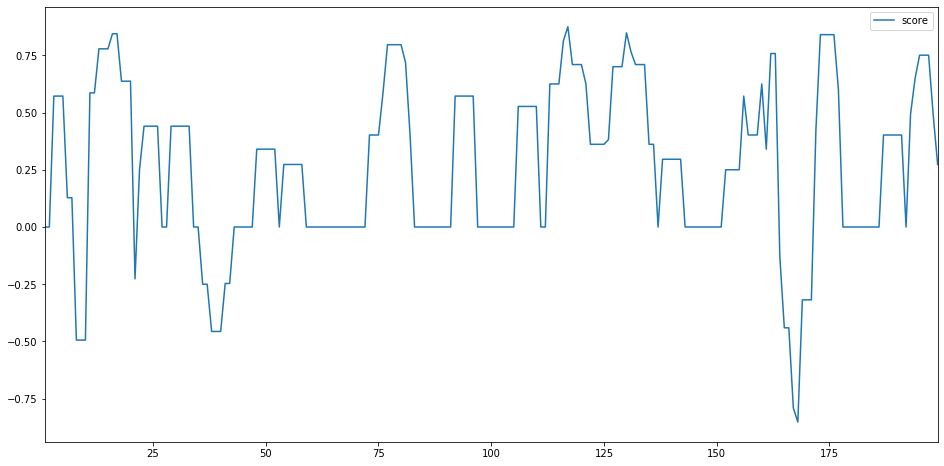

In [18]:
df.iloc[1:200].plot(figsize = (16,8))

## Creating a Animated Plot

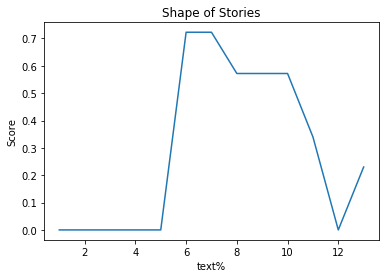

In [19]:

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    xs=[]
    ys=[]
    data = open('score.txt','r').read()
    lines = data.split('\n')
    xs = []
    ys = []
   
    for line in lines:
        x, y = line.split(',') 
        xs.append(float(x))
        ys.append(float(y))
   
    
    '''
    for i in range(len(samples)):
        xs.append(i)
        ys.append(df['score'][i])
    
    '''
    ax1.clear()
    ax1.plot(xs, ys)

    plt.xlabel('text%')
    plt.ylabel('Score')
    plt.title('Shape of Stories')

ani = animation.FuncAnimation(fig, animate, interval=1000) 
plt.show()

## Challenges

- Struck up creating animated plot (my plan is to create a plot where x axis keeps updating slowly)
- Not sure if the sentimental compound values provided by Valder is accurate



## Work to be done (Shape of Stories)

- Smoothen the plot obtained
- Create an animated plot
- Try other Sentimental Analysis Tool/libraries
- Create UI